In [1]:
import json
from matplotlib.font_manager import json_dump
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
from datetime import datetime
import time
import seaborn as sns
import matplotlib.pylab as plt

sf_data = []
vicon_data = []
dataset_name = "moving_vertical_7-9_6-3_4-3_4-9"
threshold_sf_up = 0
threshold_sf_down = 1659533710.23
threshold_vc_up = 0
threshold_vc_down = 1659533710.19

for line in open("../Dataset_sensor_floor/sensorfloor_measurement/03082022/sensor_floor_data_03082022_" + dataset_name + ".txt", "r"):
    sf_data.append(json.loads(line))

df_sf = pd.DataFrame(sf_data)
df_sf

,timestamp,strip_id,node_id,data,column_num,ID
0,1.659534e+09,3,11,"[{'r': [-70], 'm': [33.0, -55.05, 82.95]}, {'r...",3,1
1,1.659534e+09,5,14,"[{'r': [-67], 'm': [-1.05, 4.05, 109.35]}, {'r...",5,1
2,1.659534e+09,6,5,"[{'r': [-89], 'm': [172.5, -10.799999999999999...",6,1
3,1.659534e+09,1,5,"[{'r': [-92], 'm': [63.449999999999996, -81.14...",1,1
4,1.659534e+09,9,8,"[{'r': [-83], 'm': [-16.5, -57.15, 144.6]}, {'...",9,1
...,...,...,...,...,...,...
3833,1.659534e+09,17,14,"[{'r': [-71], 'm': [149.7, -71.1, 4.05]}, {'r'...",17,12
3834,1.659534e+09,5,15,"[{'r': [-81], 'm': [50.1, 42.9, 99.0]}, {'r': ...",5,12
3835,1.659534e+09,8,6,"[{'r': [0], 'm': [-58.199999999999996, 8.4, 24...",8,12
3836,1.659534e+09,3,4,"[{'r': [-89], 'm': [60.15, -5.25, -77.39999999...",3,12


In [2]:
# #THRESHOLD TIMESTAMP
#------ Dataset 0308
# #Dataset Moving Around: 1659534341.1144
# #Dataset Moving Edge: vc: 1659531074.02 ; sf: .13
# #Dataset Moving Diag 5-11 to 21-3: vc: 1659531363.02 ; sf: .04
# #Dataset Moving Diag 21-10 to 5-3: vc: 1659531522.23 ; sf: .27
# #Dataset Moving Hor 4-4 to 21-4: vc: < 1659531672.99 ; sf: 73.00 & > 1659531693.17
# #Dataset Moving Diag 21-6 to 4-6 to 21-9: vc: 1659531860.05 ; sf: .14
# #Dataset Moving Ver 7-9 to 7-3 to 9-3 to 9-9: vc: 1659532333.10 ; sf: .13
# #Dataset Moving Ver 10-9 to 10-3 to 13-3 to 13-9: vc: < 1659532488.180 ; sf: 88.210 & > 1659532529.20
# #Dataset Moving Ver 14-9 to 14-3 to 16-3 to 17-9: vc: 1659532729.310 ; sf: .30
# #Dataset Moving Ver 17-9 to 17-3 to 20-3 to 20-9: vc: 1659532980.68 ; sf: .67
# #Dataset Moving Ver 18-9 to 18-3 to 15-3 to 15-9: vc: 1659533165.63 ; sf: .62
# #Dataset Moving Ver 14-9 to 14-3 to 12-3 to 12-9: vc: 1659533346.87 ; sf: .91
# #Dataset Moving Ver 11-9 to 11-3 to 8-3 to 8-9: vc: < 1659533564.6 ; sf: .62 & > 1659533598.97
# #Dataset Moving Ver 7-9 to 6-3 to 4-3 to 4-9: vc: 1659533710.19 ; sf: .23

#------ Dataset 1708
# #Dataset Moving Around 4: vc: 1660728941.93 ; sf: 1660728942.00

**Build the dataframe of sensor floors**

In [3]:
#1st option
df_sf_buf = df_sf.copy()
df_sf_buf = df_sf_buf.reindex(df_sf_buf.columns.tolist() + ['rssi','mx','my','mz'], axis=1) 

for index, row in df_sf_buf.T.items():
    rssi = []
    magneto = []
    for i in range(len(df_sf_buf['data'][index])):
        #print((test_df['data'][index][i]['r']))
        rssi.append(df_sf_buf['data'][index][i]['r'])
        magneto.append(df_sf_buf['data'][index][i]['m'])
    
    rssi_avg = np.round(np.mean(rssi, axis=0),2)
    magneto_avg = np.round(np.mean(magneto, axis=0),2)
    df_sf_buf.loc[index,'rssi'] = rssi_avg[0]
    df_sf_buf.loc[index,'mx']  = magneto_avg[0]
    df_sf_buf.loc[index,'my']  = magneto_avg[1]
    df_sf_buf.loc[index,'mz']  = magneto_avg[2]
    rssi.clear()
    magneto.clear()

df_sf_final = df_sf_buf.drop(columns=['data'])
#df_sf_final['timestamp'] = df_sf_final['timestamp'].multiply(1000) #in ms
df_sf_final

,timestamp,strip_id,node_id,column_num,ID,rssi,mx,my,mz
0,1.659534e+09,3,11,3,1,-70.00,33.40,-55.48,82.84
1,1.659534e+09,5,14,5,1,-67.00,-0.05,3.40,109.58
2,1.659534e+09,6,5,6,1,-88.70,173.18,-12.10,72.65
3,1.659534e+09,1,5,1,1,-86.80,63.49,-81.46,177.86
4,1.659534e+09,9,8,9,1,-83.20,-14.98,-58.77,145.55
...,...,...,...,...,...,...,...,...,...
3833,1.659534e+09,17,14,17,12,-70.63,148.52,-70.22,4.60
3834,1.659534e+09,5,15,5,12,-81.58,51.06,43.44,99.45
3835,1.659534e+09,8,6,8,12,-66.89,-56.11,8.34,245.55
3836,1.659534e+09,3,4,3,12,-88.58,60.93,-5.23,-77.32


**Build Dataset of VICON Coordinates**

In [5]:
#DATASET OF VICON COORDINATES
for line in open("../Dataset_sensor_floor/vicon_measurement/03082022/vicon_data_03082022_" + dataset_name + ".txt", "r"):
    vicon_data.append(json.loads(line))

df_vicon = pd.DataFrame(vicon_data)
#df_vicon['time'] = pd.to_datetime(df_vicon['time'],unit='s')
#df_vicon['time'] = df_vicon['time'].multiply(1000)
df_vicon

,object,translation,rotation,time
0,/vicon/rb1_base_c/rb1_base_c,"[-4.2796724194165945, -2.113818880489225, 0.15...","[-0.00012019017020466994, 0.001471109224629338...",1.659534e+09
1,/vicon/rb1_base_c/rb1_base_c,"[-4.2796454832556226, -2.113829156544501, 0.15...","[-0.00022781847070460788, 0.001416592379393922...",1.659534e+09
2,/vicon/rb1_base_c/rb1_base_c,"[-4.279667415245125, -2.1138702739440403, 0.15...","[-0.00014737371754945362, 0.001472188722267925...",1.659534e+09
3,/vicon/rb1_base_c/rb1_base_c,"[-4.279648738537052, -2.1138450694810684, 0.15...","[-0.00024158127389963509, 0.001452042941443892...",1.659534e+09
4,/vicon/rb1_base_c/rb1_base_c,"[-4.279680735820758, -2.1138720691195614, 0.15...","[-9.156179628586511e-05, 0.001491736175123455,...",1.659534e+09
...,...,...,...,...
3326,/vicon/rb1_base_c/rb1_base_c,"[-6.731108194235088, -2.8441059725074176, 0.15...","[-0.003946922551341142, -0.002988387597267364,...",1.659534e+09
3327,/vicon/rb1_base_c/rb1_base_c,"[-6.731083752745016, -2.8441237323936, 0.15202...","[-0.003969006354250243, -0.003072505377979666,...",1.659534e+09
3328,/vicon/rb1_base_c/rb1_base_c,"[-6.731109751730144, -2.844096231148268, 0.151...","[-0.003916527977002225, -0.002924553981907759,...",1.659534e+09
3329,/vicon/rb1_base_c/rb1_base_c,"[-6.731049320216424, -2.844104025766171, 0.152...","[-0.003935858925473316, -0.0031929562081303886...",1.659534e+09


In [6]:
df_vicon_buf = df_vicon.copy()
df_vicon_buf = df_vicon_buf.reindex(df_vicon_buf.columns.tolist() + ['X','Y'], axis=1) 

for index, row in df_vicon_buf.T.items():
    for i in range(len(df_vicon_buf['translation'][index])):
        #print((test_df['data'][index][i]['r']))
        df_vicon_buf.loc[index,'X'] = df_vicon_buf['translation'][index][0]
        df_vicon_buf.loc[index,'Y'] = df_vicon_buf['translation'][index][1]

df_vicon_final = df_vicon_buf.drop(columns=['object','translation','rotation'])
df_vicon_final

,time,X,Y
0,1.659534e+09,-4.279672,-2.113819
1,1.659534e+09,-4.279645,-2.113829
2,1.659534e+09,-4.279667,-2.113870
3,1.659534e+09,-4.279649,-2.113845
4,1.659534e+09,-4.279681,-2.113872
...,...,...,...
3326,1.659534e+09,-6.731108,-2.844106
3327,1.659534e+09,-6.731084,-2.844124
3328,1.659534e+09,-6.731110,-2.844096
3329,1.659534e+09,-6.731049,-2.844104


**MERGE RSSI HEATMAP & VICON COORDINATES WITH ANIMATION**

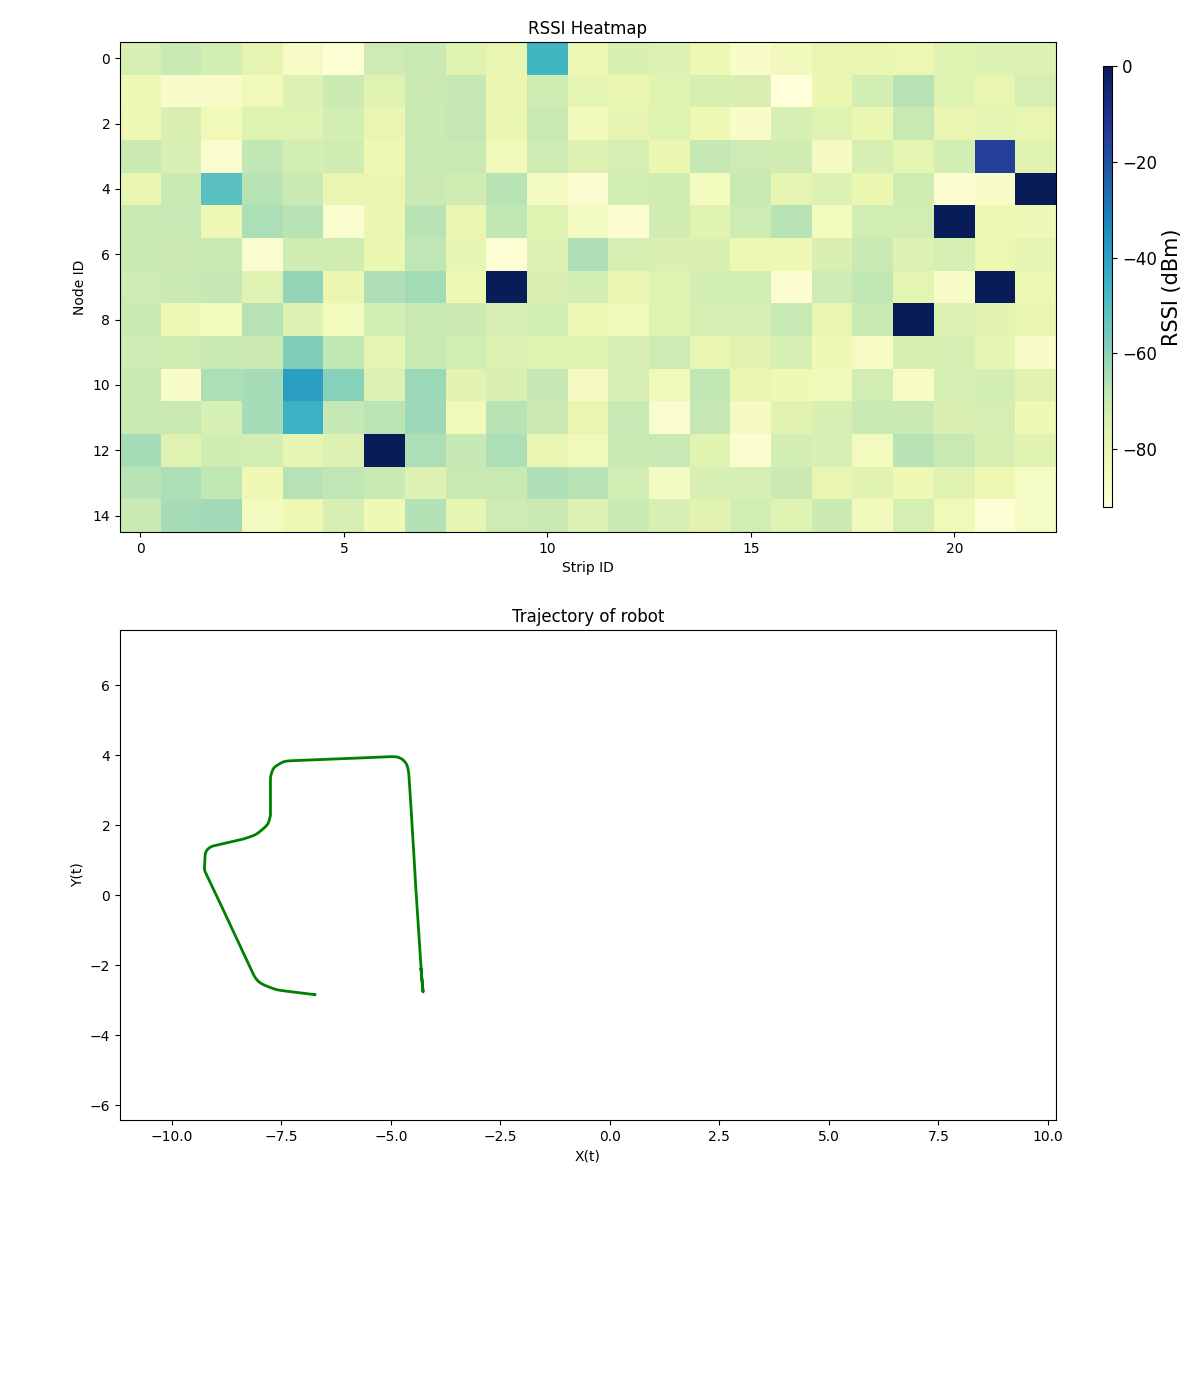

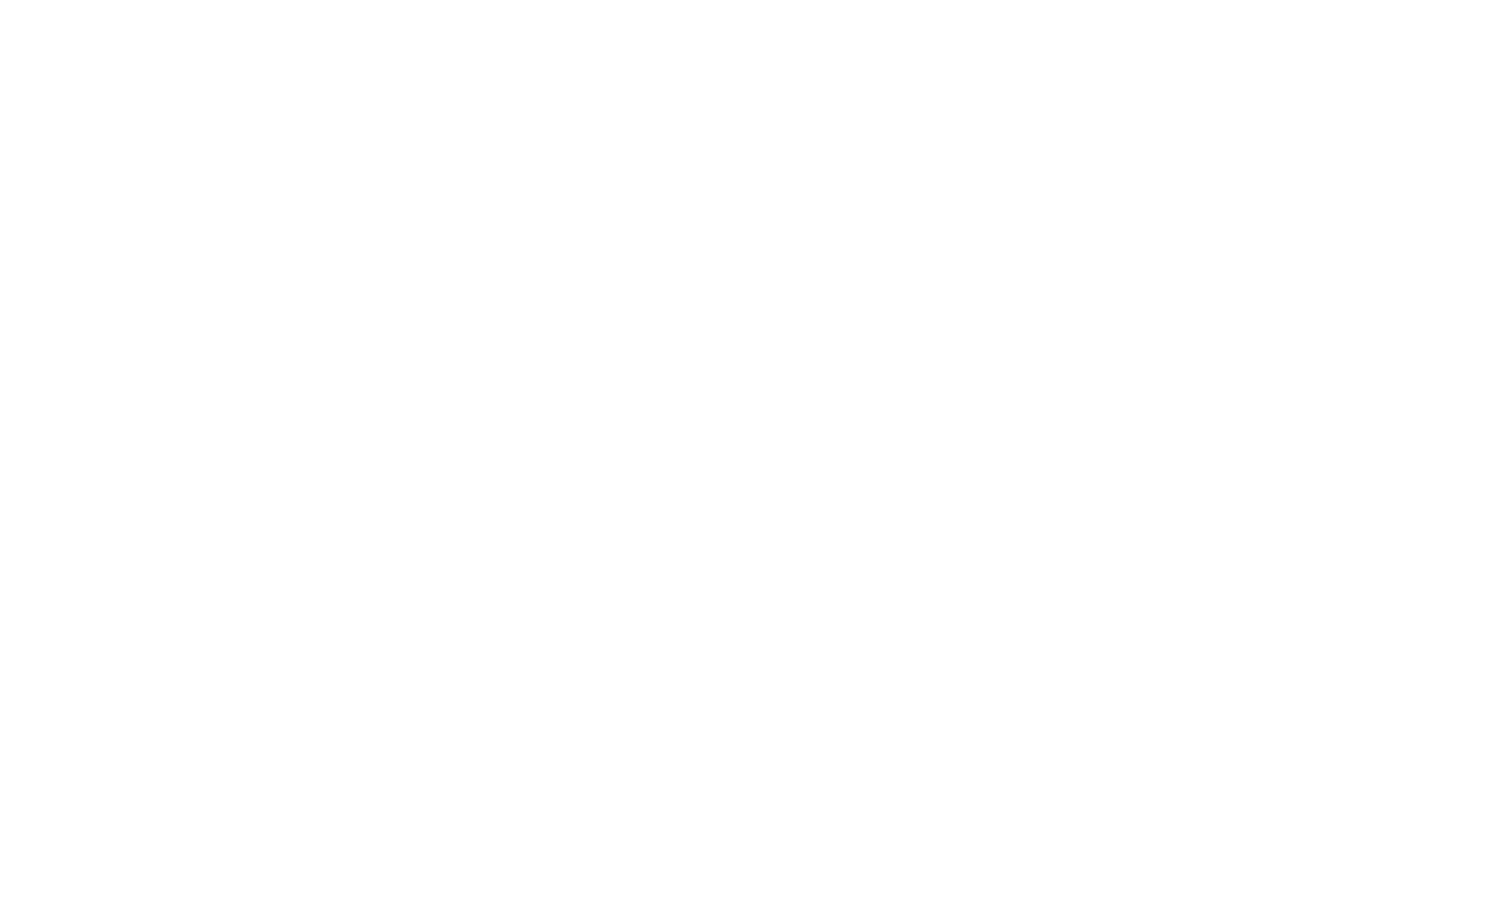

In [7]:
# #MERGE RSSI HEATMAP & VICON COORDINATES WITH ANIMATION

# #Heatmap animation over the time
# from turtle import width
# import matplotlib.animation as animation
# %matplotlib ipympl
# from matplotlib.widgets import Slider, Button, RadioButtons
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# #DEFINE DATASET ARRAY
# x_sf = df_sf_final['strip_id'].to_numpy()
# y_sf = df_sf_final['node_id'].to_numpy()
# z_sf = df_sf_final['rssi'].to_numpy()
# t_sf = df_sf_final['timestamp'].to_numpy()
# dataSet_sf = np.array([x_sf, y_sf, z_sf, t_sf])
# numDataPoints_sf = len(t_sf)
# num_of_nodes = 15
# num_of_strips = 23


# #CREATE 3D ARRAY FOR HEATMAP
# rssi_mat = np.empty((numDataPoints_sf,15,23))
# timestamp_arr = np.empty((numDataPoints_sf,15,23))
# fig = plt.figure(figsize=(15, 9))

# for index in range(numDataPoints_sf):
#     for node in range(num_of_nodes):
#         for strip in range(num_of_strips):
#             if node == int(dataSet_sf[1][index])-1 and strip == int(dataSet_sf[0][index])-1:
#                 rssi_mat[index][int(dataSet_sf[1][index])-1][int(dataSet_sf[0][index])-1] = (dataSet_sf[2][index])
#                 timestamp_arr[index][int(dataSet_sf[1][index])-1][int(dataSet_sf[0][index])-1] = (dataSet_sf[3][index])
#             else:
#                 rssi_mat[index][node][strip] = rssi_mat[index-1][node][strip]
#                 timestamp_arr[index][node][strip] = timestamp_arr[index-1][node][strip]

# #print("dataset sf old:", dataSet_sf.shape)
# #test = np.delete(dataSet_sf, 0, axis=1)
# num_del_index = 0
# num_del_last_index = 0

# #--------------------------------------uncomment to filter the timestamp---------------------------------------------#

# #DATA CLEANING/FILTERING THE DATA THAT BELOW CERTAIN TIMESTAMPS
# for index in range(numDataPoints_sf-1):
#     if dataSet_sf[3][index] < threshold_sf_down:
#        num_del_index += 1
#     # elif dataSet_sf[3][index] > threshold_sf_up:
#     #     num_del_last_index  += 1


# #print("old t_sf:", t_sf, t_sf.shape, "rssi old: ", rssi_mat.shape)

# dataSet_sf = np.delete(dataSet_sf, np.s_[0:num_del_index], axis=1)
# rssi_mat = np.delete(rssi_mat, np.s_[0:num_del_index], axis=0)
# timestamp_arr = np.delete(timestamp_arr, np.s_[0:num_del_index], axis=0)
# x_sf = np.delete(x_sf, np.s_[0:num_del_index])
# y_sf = np.delete(y_sf, np.s_[0:num_del_index])
# z_sf = np.delete(z_sf, np.s_[0:num_del_index])
# t_sf = np.delete(t_sf, np.s_[0:num_del_index])

# # dataSet_sf = np.delete(dataSet_sf, np.s_[-num_del_last_index:], axis=1)
# # rssi_mat = np.delete(rssi_mat, np.s_[-num_del_last_index:], axis=0)
# # timestamp_arr = np.delete(timestamp_arr, np.s_[-num_del_last_index:], axis=0)
# # x_sf = np.delete(x_sf, np.s_[-num_del_last_index:])
# # y_sf = np.delete(y_sf, np.s_[-num_del_last_index:])
# # z_sf = np.delete(z_sf, np.s_[-num_del_last_index:])
# # t_sf = np.delete(t_sf, np.s_[-num_del_last_index:])

# numDataPoints_sf = dataSet_sf.shape[1]
# # print("dataset sf:",dataSet_sf.shape, "rssi new: ", rssi_mat.shape)
# # print(dataSet_sf)

# delta_t_sf = round((t_sf.max()-t_sf.min())/numDataPoints_sf, 6)

# #print("new t_sf:", t_sf, t_sf.shape, "x_sf:", x_sf.shape, "y_sf:", y_sf.shape, "z_sf:", z_sf.shape)

# #-------------------------------------------------------------------------------------------------------------------#

# #CREATE DATASET FOR VICON COORDINATES
# t_vc = df_vicon_final['time'].to_numpy()
# x_vc = df_vicon_final['X'].to_numpy()
# y_vc = df_vicon_final['Y'].to_numpy()
# dataSet_vc = np.array([x_vc, y_vc, t_vc])
# numDataPoints_vc = len(t_vc)

# # print("dataset vc old:", dataSet_vc.shape)

# # #--------------------------------------uncomment to filter the timestamp---------------------------------------------#

# num_del_index = 0
# num_del_last_index = 0

# #DATA CLEANING/FILTERING THE DATA THAT BELOW CERTAIN TIMESTAMPS
# for index in range(numDataPoints_vc-1):
#     if dataSet_vc[2][index] < threshold_vc_down:
#        num_del_index += 1
#     # elif dataSet_vc[2][index] > threshold_vc_up:
#     #     num_del_last_index  += 1

# #print("old t_vc:", t_vc, t_vc.shape)

# dataSet_vc = np.delete(dataSet_vc, np.s_[0:num_del_index], axis=1)
# x_vc = np.delete(x_vc, np.s_[0:num_del_index])
# y_vc = np.delete(y_vc, np.s_[0:num_del_index])
# t_vc = np.delete(t_vc, np.s_[0:num_del_index])

# # dataSet_vc = np.delete(dataSet_vc, np.s_[-num_del_last_index:], axis=1)
# # x_vc = np.delete(x_vc, np.s_[-num_del_last_index:])
# # y_vc = np.delete(y_vc, np.s_[-num_del_last_index:])
# # t_vc = np.delete(t_vc, np.s_[-num_del_last_index:])

# numDataPoints_vc = dataSet_vc.shape[1]
# # print("dataset vc:",dataSet_vc.shape)
# # print(dataSet_vc)

# delta_t_vc = round((t_vc.max()-t_vc.min())/numDataPoints_vc, 6)
# #-------------------------------------------------------------------------------------------------------------------#

# # GET SOME MATPLOTLIB OBJECTS
# #fig, (ax1, ax2) = plt.subplots(figsize=(10,12), nrows=2)
# fig = plt.figure(figsize=(12,14))
# #plt.subplots_adjust(bottom=0.25)


# # AXES PROPERTIES RSSI HEATMAP
# ax1 = fig.add_subplot(211) #(row, column, pos)
# #ax1.set_autoscale_on
# ax1.set_xlabel('Strip ID')
# ax1.set_ylabel('Node ID')
# ax1.set_title('RSSI Heatmap')

# # # AXES PROPERTIES VICON COORDINATES
# ax2 = fig.add_subplot(212)
# ax2.set_xlim(-11.185, 10.185)
# ax2.set_ylim(-6.425, 7.575)
# ax2.set_xlabel('X(t)')
# ax2.set_ylabel('Y(t)')
# ax2.set_title('Trajectory of robot')


# #DISPLAY INITIAL IMAGE
# im_h = ax1.imshow(rssi_mat[numDataPoints_sf-1], cmap="YlGnBu", aspect='auto')
# axins = inset_axes(ax1,
#                    width="1%",  # width = 5% of parent_bbox width
#                    height="90%",  # height : 50%
#                    loc='lower left',
#                    bbox_to_anchor=(1.05, 1.25, 1, 1),
#                    bbox_transform=ax2.transAxes,
#                    borderpad=0,
#                    )
# cbar = plt.colorbar(im_h, cax=axins, ax=ax1)
# cbar.set_label(label='RSSI (dBm)', size=15)
# cbar.ax.tick_params(labelsize=12)


# line = ax2.plot(dataSet_vc[0], dataSet_vc[1], lw=2, c='g')[0] # For line plot


# def find_nearest(array, value):
#     array = np.asarray(array)
#     idx = (np.abs(array - value)).argmin()
#     return idx

# def animate(num, rssi_mat, line, dataSet_sf, dataSet_vc):
#     line.set_xdata(dataSet_vc[0, :num])
#     line.set_ydata(dataSet_vc[1, :num])
#     index_rssi = find_nearest(dataSet_sf[3], dataSet_vc[2,num])
#     im_h.set_data(rssi_mat[index_rssi]) 
#     return line

# plt.subplots_adjust(left=0.1, bottom=0.2, right=0.88, top=0.97, hspace=0.2)
# anim = animation.FuncAnimation(fig, animate, frames=numDataPoints_vc, fargs=(rssi_mat, line, dataSet_sf, dataSet_vc), interval=2.5, repeat=False, blit=False)
# # anim.save(r'Animation_Move_Around4_17082022.mp4')

# plt.show()

**MERGE RSSI HEATMAP & VICON COORDINATES WITH SLIDER**

In [8]:
#MERGE RSSI HEATMAP & VICON COORDINATES WITH SLIDER

#Heatmap animation over the time
from turtle import width
import matplotlib.animation as animation
%matplotlib ipympl
from matplotlib.widgets import Slider, Button, RadioButtons
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

#DEFINE DATASET ARRAY
x_sf = df_sf_final['strip_id'].to_numpy()
y_sf = df_sf_final['node_id'].to_numpy()
z_sf = df_sf_final['rssi'].to_numpy()
t_sf = df_sf_final['timestamp'].to_numpy()
dataSet_sf = np.array([x_sf, y_sf, z_sf, t_sf])
numDataPoints_sf = len(t_sf)
num_of_nodes = 15
num_of_strips = 23


#CREATE 3D ARRAY FOR HEATMAP
rssi_mat = np.empty((numDataPoints_sf,15,23))
timestamp_arr = np.empty((numDataPoints_sf,15,23))
fig = plt.figure(figsize=(15, 9))

for index in range(numDataPoints_sf):
    for node in range(num_of_nodes):
        for strip in range(num_of_strips):
            if node == int(dataSet_sf[1][index])-1 and strip == int(dataSet_sf[0][index])-1:
                rssi_mat[index][int(dataSet_sf[1][index])-1][int(dataSet_sf[0][index])-1] = (dataSet_sf[2][index])
                timestamp_arr[index][int(dataSet_sf[1][index])-1][int(dataSet_sf[0][index])-1] = (dataSet_sf[3][index])
            else:
                rssi_mat[index][node][strip] = rssi_mat[index-1][node][strip]
                timestamp_arr[index][node][strip] = timestamp_arr[index-1][node][strip]

#print("dataset sf old:", dataSet_sf.shape)
#test = np.delete(dataSet_sf, 0, axis=1)
num_del_index = 0
num_del_last_index = 0

#--------------------------------------uncomment to filter the timestamp---------------------------------------------#

#DATA CLEANING/FILTERING THE DATA THAT BELOW CERTAIN TIMESTAMPS
for index in range(numDataPoints_sf-1):
    if dataSet_sf[3][index] < threshold_sf_down:
       num_del_index += 1
    # elif dataSet_sf[3][index] > threshold_sf_up:
    #     num_del_last_index  += 1


#print("old t_sf:", t_sf, t_sf.shape, "rssi old: ", rssi_mat.shape)

dataSet_sf = np.delete(dataSet_sf, np.s_[0:num_del_index], axis=1)
rssi_mat = np.delete(rssi_mat, np.s_[0:num_del_index], axis=0)
timestamp_arr = np.delete(timestamp_arr, np.s_[0:num_del_index], axis=0)
x_sf = np.delete(x_sf, np.s_[0:num_del_index])
y_sf = np.delete(y_sf, np.s_[0:num_del_index])
z_sf = np.delete(z_sf, np.s_[0:num_del_index])
t_sf = np.delete(t_sf, np.s_[0:num_del_index])

# dataSet_sf = np.delete(dataSet_sf, np.s_[-num_del_last_index:], axis=1)
# rssi_mat = np.delete(rssi_mat, np.s_[-num_del_last_index:], axis=0)
# timestamp_arr = np.delete(timestamp_arr, np.s_[-num_del_last_index:], axis=0)
# x_sf = np.delete(x_sf, np.s_[-num_del_last_index:])
# y_sf = np.delete(y_sf, np.s_[-num_del_last_index:])
# z_sf = np.delete(z_sf, np.s_[-num_del_last_index:])
# t_sf = np.delete(t_sf, np.s_[-num_del_last_index:])

numDataPoints_sf = dataSet_sf.shape[1]
# print("dataset sf:",dataSet_sf.shape, "rssi new: ", rssi_mat.shape)
# print(dataSet_sf)

delta_t_sf = round((t_sf.max()-t_sf.min())/numDataPoints_sf, 6)

#print("new t_sf:", t_sf, t_sf.shape, "x_sf:", x_sf.shape, "y_sf:", y_sf.shape, "z_sf:", z_sf.shape)

#-------------------------------------------------------------------------------------------------------------------#

#CREATE DATASET FOR VICON COORDINATES
t_vc = df_vicon_final['time'].to_numpy()
x_vc = df_vicon_final['X'].to_numpy()
y_vc = df_vicon_final['Y'].to_numpy()
dataSet_vc = np.array([x_vc, y_vc, t_vc])
numDataPoints_vc = len(t_vc)

# print("dataset vc old:", dataSet_vc.shape)

# #--------------------------------------uncomment to filter the timestamp---------------------------------------------#

num_del_index = 0
num_del_last_index = 0

#DATA CLEANING/FILTERING THE DATA THAT BELOW CERTAIN TIMESTAMPS
for index in range(numDataPoints_vc-1):
    if dataSet_vc[2][index] < threshold_vc_down:
       num_del_index += 1
    # elif dataSet_vc[2][index] > threshold_vc_up:
    #     num_del_last_index  += 1

#print("old t_vc:", t_vc, t_vc.shape)

dataSet_vc = np.delete(dataSet_vc, np.s_[0:num_del_index], axis=1)
x_vc = np.delete(x_vc, np.s_[0:num_del_index])
y_vc = np.delete(y_vc, np.s_[0:num_del_index])
t_vc = np.delete(t_vc, np.s_[0:num_del_index])

# dataSet_vc = np.delete(dataSet_vc, np.s_[-num_del_last_index:], axis=1)
# x_vc = np.delete(x_vc, np.s_[-num_del_last_index:])
# y_vc = np.delete(y_vc, np.s_[-num_del_last_index:])
# t_vc = np.delete(t_vc, np.s_[-num_del_last_index:])

numDataPoints_vc = dataSet_vc.shape[1]
# print("dataset vc:",dataSet_vc.shape)
# print(dataSet_vc)

delta_t_vc = round((t_vc.max()-t_vc.min())/numDataPoints_vc, 6)
#-------------------------------------------------------------------------------------------------------------------#

# GET SOME MATPLOTLIB OBJECTS
#fig, (ax1, ax2) = plt.subplots(figsize=(10,12), nrows=2)
fig = plt.figure(figsize=(12,14))
plt.subplots_adjust(bottom=0.25)


# AXES PROPERTIES RSSI HEATMAP
ax1 = fig.add_subplot(211) #(row, column, pos)
#ax1.set_autoscale_on
ax1.set_xlabel('Strip ID')
ax1.set_ylabel('Node ID')
ax1.set_title('RSSI Heatmap')

# # AXES PROPERTIES VICON COORDINATES
ax2 = fig.add_subplot(212)
ax2.set_xlim(-11.185, 10.185)
ax2.set_ylim(-6.425, 7.575)
ax2.set_xlabel('X(t)')
ax2.set_ylabel('Y(t)')
ax2.set_title('Trajectory of robot')


# Defining the Slider button
# xposition, yposition, width and height
ax_slide_sf = plt.axes([0.155, 0.02, 0.65, 0.03])
ax_slide_vc = plt.axes([0.155, 0.07, 0.65, 0.03])
ax_slide_merge = plt.axes([0.155, 0.12, 0.65, 0.03])


#DISPLAY INITIAL IMAGE
im_h = ax1.imshow(rssi_mat[numDataPoints_sf-1], cmap="YlGnBu", aspect='auto')
axins = inset_axes(ax1,
                   width="1%",  # width = 5% of parent_bbox width
                   height="90%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 1.25, 1, 1),
                   bbox_transform=ax2.transAxes,
                   borderpad=0,
                   )
cbar = plt.colorbar(im_h, cax=axins, ax=ax1)
cbar.set_label(label='RSSI (dBm)', size=15)
cbar.ax.tick_params(labelsize=12)


#cbar.ax.set_axes_locator
# #cbar.set_ticks()

line = ax2.plot(dataSet_vc[0], dataSet_vc[1], lw=2, c='g')[0] # For line plot


# Properties of the slider
#with filtered data
# timestamp_rssi = Slider(ax_slide_sf, 'Timestamp SF(ms)',
#                   dataSet_sf[3].min(), dataSet_sf[3].max(), valinit=dataSet_sf[3].min(), valstep=delta_t_sf)
# timestamp_vc = Slider(ax_slide_vc, 'Timestamp VC(ms)',
#                   dataSet_vc[2].min(), dataSet_vc[2].max(), valinit=dataSet_vc[2].min(), valstep=delta_t_vc)

#normal data
timestamp_rssi = Slider(ax_slide_sf, 'Timestamp SF(s)',
                  t_sf.min(), t_sf.max(), valinit=t_sf.min(), valstep=delta_t_sf)
timestamp_vc = Slider(ax_slide_vc, 'Timestamp VC(s)',
                  t_vc.min(), t_vc.max(), valinit=t_vc.min(), valstep=delta_t_vc)
timestamp_merge = Slider(ax_slide_merge, 'Timestamp (s)',
                  t_vc.min(), t_vc.max(), valinit=t_vc.min(), valstep=delta_t_vc)

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx


def update_heatmap(val):
    pos = timestamp_rssi.val
    index = find_nearest(dataSet_sf[3], pos)
    im_h.set_data(rssi_mat[index])

def update_coord(val):
    pos = timestamp_vc.val
    index = find_nearest(dataSet_vc[2], pos)
    line.set_xdata(dataSet_vc[0, :index])
    line.set_ydata(dataSet_vc[1, :index])

    #redrawing the figure
    fig.canvas.draw()    

def update_all(val):
    pos = timestamp_merge.val
    index = find_nearest(dataSet_vc[2], pos)
    line.set_xdata(dataSet_vc[0, :index])
    line.set_ydata(dataSet_vc[1, :index])

    index2 = find_nearest(dataSet_sf[3], pos)
    im_h.set_data(rssi_mat[index2])

    #redrawing the figure
    fig.canvas.draw() 

# Calling the function "update" when the value of the slider is changed
timestamp_rssi.on_changed(update_heatmap)
timestamp_vc.on_changed(update_coord)
timestamp_merge.on_changed(update_all)

#fig.tight_layout()
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.88, top=0.97, hspace=0.2)
#plt.subplots_adjust(left=0.155, bottom=0.2, right=0.91, top=0.97, hspace=0.2)
#plt.subplot_tool()
plt.show()

In [9]:
# print(dataSet_sf.shape)
# data_trans = np.transpose(dataSet_sf)
# test_sf = pd.DataFrame(data_trans, columns=['strip_id','node_id','rssi','timestamp'])
# test_sf

# print(dataSet_sf.shape)
# print(dataSet_sf[3][0])
# # print(rssi_mat.shape[0], dataSet_vc.shape)

**CREATE FRAME FOR MERGED DATASET**

In [10]:
# #CREATE FRAME FOR MERGED DATASET

# #INITIALIZE THE VARIABLES
# strip_id = ''
# node_id = ''
# rssi_val = ''
# timestamp = ''
# count = 0
# frame = ""

# #TRANSPOSE the dataset of VICON
# dataSet_vc_trans = np.transpose(dataSet_vc)
# array_frame_vc = dataSet_vc_trans.astype(object)

# #DEFINE STRING ARRAY FOR SF FRAME
# array_frame_sf = np.empty(rssi_mat.shape[0], dtype=object)

# #DEFINE STRING ARRAY FOR VICON FRAME
# dataSet_vc_trans = np.transpose(dataSet_vc)
# array_frame_vc = dataSet_vc_trans.astype(object)

# for index in range(rssi_mat.shape[0]):
#     for col in range(rssi_mat[index].shape[1]):
#         for row in range(rssi_mat[index].shape[0]):
#             if count == 0:
#                 strip_id += '{"strip_id":' + '{"' + str(count) + '":' + str(col+1) + ','
#                 node_id += ',"node_id":' + '{"' + str(count) + '":' + str(row+1) + ','
#                 rssi_val += ',"r":' + '{"' + str(count) + '":' + str(rssi_mat[index][row][col]) + ','
#                 timestamp += ',"timestamp":' + '{"' + str(count) + '":' + str(timestamp_arr[index][row][col]) + ','
#                 count += 1
#             elif count == 344:
#                 strip_id += '"' + str(count) + '":' + str(col+1) + '}'
#                 node_id += '"' + str(count) + '":' + str(row+1) + '}'
#                 #rssi_val += '"' + str(count) + '":' + str(rssi_mat[345][row][col]) + '}' + '}'
#                 rssi_val += '"' + str(count) + '":' + str(rssi_mat[index][row][col]) + '}'
#                 timestamp += '"' + str(count) + '":' + str(timestamp_arr[index][row][col]) + '}' + '}'
#                 count = 0
#             else:

#                 strip_id += '"' + str(count) + '":' + str(col+1) + ','
#                 node_id += '"' + str(count) + '":' + str(row+1) + ','
#                 rssi_val += '"' + str(count) + '":' + str(rssi_mat[index][row][col]) + ','
#                 timestamp += '"' + str(count) + '":' + str(timestamp_arr[index][row][col]) + ','
#                 count += 1
            

#     frame = strip_id + node_id + rssi_val + timestamp
#     #print(frame)
#     array_frame_sf[index] = frame
#     frame = ""
#     strip_id = ""
#     node_id = ""
#     rssi_val = ""
#     timestamp = ""

    
# print(array_frame_sf)

# def closest_timestamp(array, value):
#     array = np.asarray(array)
#     idx = (np.abs(array - value)).argmin()
#     return idx

# # frame_sf = pd.DataFrame(array_frame, columns=['data'])
# # frame_sf

# #MERGE DATASET
# frame_number = np.empty(array_frame_vc.shape[0], dtype=object)
# frame_data = np.empty(array_frame_vc.shape[0], dtype=object)
# frame_count = 0
# for row in range(array_frame_vc.shape[0]):
#     time_vc = dataSet_vc[2][row]
#     #index_vc = closest_timestamp(dataSet_vc[2], time_vc)
#     index_sf = closest_timestamp(dataSet_sf[3], time_vc)

#     frame_number[row] = str(frame_count)
#     frame_data[row] = array_frame_sf[index_sf]
#     frame_count += 1

# #print(frame_number)
# #print(frame_data)


**GENERATES THE DATASET AS .CSV FILE**

In [11]:
# dataSet_final = np.array([frame_number, array_frame_vc[:,0], array_frame_vc[:,1], frame_data])
# dataSet_final = np.transpose(dataSet_final)
# #dataSet_final.shape
# frame_sf = pd.DataFrame(dataSet_final, columns=['frame','vicon_X','vicon_Y','data'])
# data_dir = '../Dataset_sensor_floor/Dataset_Final/03082022_V2/'
# csv_name = data_dir + 'dataset_0308022_' + dataset_name + '.csv'
# frame_sf.to_csv(csv_name, index=False)
# dataSet_final

In [12]:
# frame_sf